In [1]:
import os, time, itertools, pickle
# import imageio
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

In [2]:
%matplotlib notebook

In [3]:
# leaky_relu
def lrelu(X, leak=0.2):
    f1 = 0.5 * (1 + leak)
    f2 = 0.5 * (1 - leak)
    return f1 * X + f2 * tf.abs(X)

In [4]:
# G(z)
def generator(x, y, isTrain=True, reuse=False):
    with tf.variable_scope('generator', reuse=reuse):
        w_init = tf.contrib.layers.xavier_initializer()

        cat1 = tf.concat([x, y], 1)

        dense1 = tf.layers.dense(cat1, 128, kernel_initializer=w_init)
        relu1 = tf.nn.relu(dense1)

        dense2 = tf.layers.dense(relu1, 784, kernel_initializer=w_init)
        o = tf.nn.tanh(dense2)

        return o

In [5]:
# D(x)
def discriminator(x, y, isTrain=True, reuse=False):
    with tf.variable_scope('discriminator', reuse=reuse):
        w_init = tf.contrib.layers.xavier_initializer()

        cat1 = tf.concat([x, y], 1)

        dense1 = tf.layers.dense(cat1, 128, kernel_initializer=w_init)
        lrelu1 = lrelu(dense1, 0.2)

        dense2 = tf.layers.dense(lrelu1, 1, kernel_initializer=w_init)
        o = tf.nn.sigmoid(dense2)

        return o, dense2

In [6]:
# label preprocess
onehot = np.eye(10)

temp_z_ = np.random.normal(0, 1, (10, 100))
fixed_z_ = temp_z_
fixed_y_ = np.zeros((10, 1))

for i in range(9):
    fixed_z_ = np.concatenate([fixed_z_, temp_z_], 0)
    temp = np.ones((10,1)) + i
    fixed_y_ = np.concatenate([fixed_y_, temp], 0)

fixed_y_ = onehot[fixed_y_.astype(np.int32)].squeeze()

In [7]:
def show_result(num_epoch, show = False, save = False, path = 'result.png'):
    test_images = sess.run(G_z, {z: fixed_z_, y: fixed_y_, isTrain: False})

    size_figure_grid = 10
    fig, ax = plt.subplots(size_figure_grid, size_figure_grid, figsize=(5, 5))
    for i, j in itertools.product(range(size_figure_grid), range(size_figure_grid)):
        ax[i, j].get_xaxis().set_visible(False)
        ax[i, j].get_yaxis().set_visible(False)

    for k in range(size_figure_grid*size_figure_grid):
        i = k // size_figure_grid
        j = k % size_figure_grid
        ax[i, j].cla()
        ax[i, j].imshow(np.reshape(test_images[k], (28, 28)), cmap='gray')

    label = 'Epoch {0}'.format(num_epoch)
    fig.text(0.5, 0.04, label, ha='center')

    if save:
        plt.savefig(path)

    if show:
        plt.show()
    else:
        plt.close()

In [8]:
def show_result_live(num_epoch, fig, ax):
    test_images = sess.run(G_z, {z: fixed_z_, y: fixed_y_, isTrain: False})

    
    for i, j in itertools.product(range(size_figure_grid), range(size_figure_grid)):
        ax[i, j].get_xaxis().set_visible(False)
        ax[i, j].get_yaxis().set_visible(False)

    for k in range(size_figure_grid*size_figure_grid):
        i = k // size_figure_grid
        j = k % size_figure_grid
        ax[i, j].cla()
        ax[i, j].imshow(np.reshape(test_images[k], (28, 28)), cmap='gray')

    label = 'Epoch {0}'.format(num_epoch)
    fig.text(0.5, 0.04, label, ha='center')
    
    fig.canvas.draw(); 
    plt.pause(0.02)

In [9]:
def show_train_hist(hist, show = False, save = False, path = 'Train_hist.png'):
    x = range(len(hist['D_losses']))

    y1 = hist['D_losses']
    y2 = hist['G_losses']

    plt.plot(x, y1, label='D_loss')
    plt.plot(x, y2, label='G_loss')

    plt.xlabel('Epoch')
    plt.ylabel('Loss')

    plt.legend(loc=4)
    plt.grid(True)
    plt.tight_layout()

    if save:
        plt.savefig(path)

    if show:
        plt.show()
    else:
        plt.close()

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


<IPython.core.display.Javascript object>


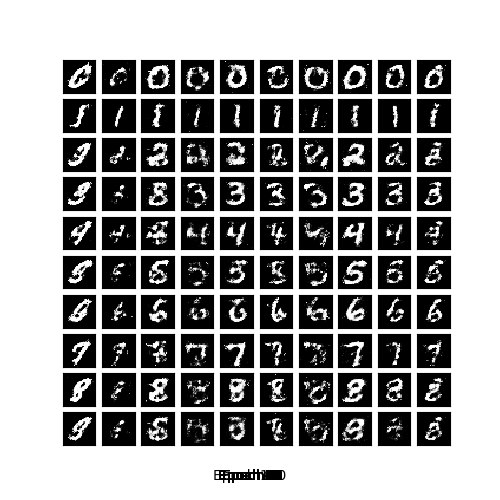

training start!
[1/100] - ptime: 2.44 loss_d: 0.962, loss_g: 0.846
[2/100] - ptime: 2.28 loss_d: 1.073, loss_g: 1.003
[3/100] - ptime: 2.25 loss_d: 0.926, loss_g: 1.242
[4/100] - ptime: 2.28 loss_d: 0.934, loss_g: 1.247
[5/100] - ptime: 2.25 loss_d: 0.904, loss_g: 1.368
[6/100] - ptime: 2.27 loss_d: 1.030, loss_g: 1.397
[7/100] - ptime: 2.26 loss_d: 1.098, loss_g: 1.216
[8/100] - ptime: 2.31 loss_d: 0.959, loss_g: 1.285
[9/100] - ptime: 2.26 loss_d: 0.925, loss_g: 1.309
[10/100] - ptime: 2.28 loss_d: 0.822, loss_g: 1.386
[11/100] - ptime: 2.24 loss_d: 0.911, loss_g: 1.322
[12/100] - ptime: 2.30 loss_d: 0.843, loss_g: 1.366
[13/100] - ptime: 2.24 loss_d: 0.829, loss_g: 1.451
[14/100] - ptime: 2.25 loss_d: 0.876, loss_g: 1.424
[15/100] - ptime: 2.24 loss_d: 0.856, loss_g: 1.466
[16/100] - ptime: 2.26 loss_d: 0.819, loss_g: 1.595
[17/100] - ptime: 2.28 loss_d: 0.699, loss_g: 1.820
[18/100] - ptime: 2.24 loss_d: 0.703, loss_g: 1.882
[19/100] - ptime: 2.26 loss_d: 0.702, loss_g: 1.951
[20/1

In [10]:
# training parameters
batch_size = 100
lr = 0.0002
train_epoch = 100

# load MNIST
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
train_set = (mnist.train.images - 0.5) / 0.5  # normalization; range: -1 ~ 1
train_label = mnist.train.labels

# variables : input
x = tf.placeholder(tf.float32, shape=(None, 784))
y = tf.placeholder(tf.float32, shape=(None, 10))
z = tf.placeholder(tf.float32, shape=(None, 100))
isTrain = tf.placeholder(dtype=tf.bool)

# networks : generator
G_z = generator(z, y, isTrain)

# networks : discriminator
D_real, D_real_logits = discriminator(x, y, isTrain)
D_fake, D_fake_logits = discriminator(G_z, y, isTrain, reuse=True)

# loss for each network
D_loss_real = tf.reduce_mean(
    tf.nn.sigmoid_cross_entropy_with_logits(logits=D_real_logits, labels=tf.ones([batch_size, 1]))
)

D_loss_fake = tf.reduce_mean(
    tf.nn.sigmoid_cross_entropy_with_logits(logits=D_fake_logits, labels=tf.zeros([batch_size, 1]))
)

D_loss = D_loss_real + D_loss_fake

G_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=D_fake_logits, labels=tf.ones([batch_size, 1])))

# trainable variables for each network
T_vars = tf.trainable_variables()
D_vars = [var for var in T_vars if var.name.startswith('discriminator')]
G_vars = [var for var in T_vars if var.name.startswith('generator')]

# optimizer for each network
with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
    D_optim = tf.train.AdamOptimizer(lr, beta1=0.5).minimize(D_loss, var_list=D_vars)
    G_optim = tf.train.AdamOptimizer(lr, beta1=0.5).minimize(G_loss, var_list=G_vars)

# open session and initialize all variables
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

# results save folder
root = 'MNIST_cGAN_results/'
model = 'MNIST_cGAN_'
if not os.path.isdir(root):
    os.mkdir(root)
if not os.path.isdir(root + 'Fixed_results'):
    os.mkdir(root + 'Fixed_results')

train_hist = {}
train_hist['D_losses'] = []
train_hist['G_losses'] = []
train_hist['per_epoch_ptimes'] = []
train_hist['total_ptime'] = []

size_figure_grid = 10
fig, ax = plt.subplots(size_figure_grid, size_figure_grid, figsize=(5, 5))

# training-loop
np.random.seed(int(time.time()))
print('training start!')
start_time = time.time()
for epoch in range(train_epoch):
    G_losses = []
    D_losses = []
    epoch_start_time = time.time()
    for iter in range(len(train_set) // batch_size):
        # update discriminator
        x_ = train_set[iter * batch_size:(iter + 1) * batch_size]
        y_ = train_label[iter * batch_size:(iter + 1) * batch_size]

        z_ = np.random.normal(0, 1, (batch_size, 100))

        loss_d_, _ = sess.run([D_loss, D_optim], {x: x_, y: y_, z: z_, isTrain: True})
        D_losses.append(loss_d_)

        # update generator
        z_ = np.random.normal(0, 1, (batch_size, 100))
        y_ = np.random.randint(0, 9, (batch_size, 1))
        y_ = onehot[y_.astype(np.int32)].squeeze()
        loss_g_, _ = sess.run([G_loss, G_optim], {z: z_, x: x_, y: y_, isTrain: True})
        G_losses.append(loss_g_)

    epoch_end_time = time.time()
    per_epoch_ptime = epoch_end_time - epoch_start_time
    print('[%d/%d] - ptime: %.2f loss_d: %.3f, loss_g: %.3f' % ((epoch + 1), train_epoch, per_epoch_ptime, np.mean(D_losses), np.mean(G_losses)))
    fixed_p = root + 'Fixed_results/' + model + str(epoch + 1) + '.png'
#     show_result((epoch + 1), save=True, path=fixed_p)
    
    show_result_live((epoch + 1), fig, ax)
    
    train_hist['D_losses'].append(np.mean(D_losses))
    train_hist['G_losses'].append(np.mean(G_losses))
    train_hist['per_epoch_ptimes'].append(per_epoch_ptime)

end_time = time.time()
total_ptime = end_time - start_time
train_hist['total_ptime'].append(total_ptime)

print('Avg per epoch ptime: %.2f, total %d epochs ptime: %.2f' % (np.mean(train_hist['per_epoch_ptimes']), train_epoch, total_ptime))
print("Training finish!... save training results")
with open(root + model + 'train_hist.pkl', 'wb') as f:
    pickle.dump(train_hist, f)

show_train_hist(train_hist, save=True, path=root + model + 'train_hist.png')

images = []

# for e in range(train_epoch):
#     img_name = root + 'Fixed_results/' + model + str(e + 1) + '.png'
#     images.append(imageio.imread(img_name))
# imageio.mimsave(root + model + 'generation_animation.gif', images, fps=5)

sess.close()